In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

city_data.head()
ride_data.head()
# Combine the data into a single dataset
cityride_data = pd.merge(city_data,ride_data, on = "city")

# Display the data table for preview
cityride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

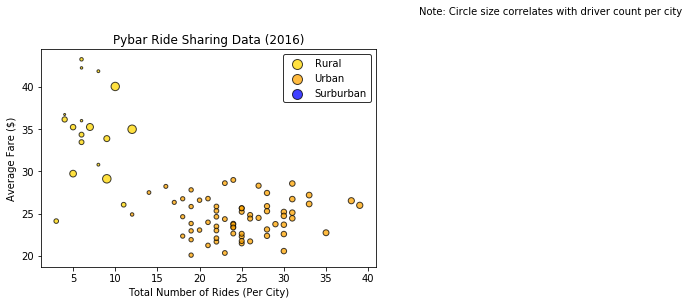

In [11]:
# Obtain the x and y coordinates for each of the three city types

city_type = cityride_data.groupby("city")

count_rides = city_type['ride_id'].count()

mean_rides = city_type['fare'].mean()

type_city = city_data.set_index('city')['type']

drivers = city_type['driver_count'].sum()

plot_table = pd.DataFrame({"Average Fare":mean_rides,
                         "Total Number of Rides":count_rides,
                         "Total Drivers":drivers,
                         "City Type":type_city})
plot_table

# Build the scatter plots for each city types
urban = plot_table.loc[plot_table["City Type"] == 'Urban']
surburban = plot_table.loc[plot_table["City Type"]== 'Surburban']
rural = plot_table.loc[plot_table['City Type']== 'Rural']

plt.title("Pybar Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate the other graph properties
plt.scatter(rural["Total Number of Rides"], rural["Average Fare"], marker='o', facecolors='Gold', edgecolors='Black', label='Rural', s=rural["Total Drivers"], alpha=0.75)
plt.scatter(urban["Total Number of Rides"], urban["Average Fare"], marker='o', facecolor='Orange', edgecolors='Black', label='Urban', s=urban["Total Number of Rides"], alpha=0.75)
plt.scatter(surburban["Total Number of Rides"], surburban["Average Fare"], marker='o', facecolors='Blue', edgecolors='Black', label='Surburban', s=surburban["Total Drivers"], alpha=0.75)
# Create a legend
legend = plt.legend(frameon=True, edgecolor='Black')
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]
# Incorporate a text label regarding circle size
plt.figtext(1.0,1.0, "Note: Circle size correlates with driver count per city")
# Save Figure
plt.savefig('bubble_plot.png')
plt.show()

In [7]:
# Show plot
plt.show()

## Total Fares by City Type

In [19]:
# Calculate Type Percents
total_fares = cityride_data["fare"].sum()

# creating a groupby statement

city_type = cityride_data.groupby("type")


# Calculate Type Percents

fare_type = city_type["fare"].sum()


percentage = (fare_type/total_fares) * 100 
percentage


# Build Pie Chart
plt.figure(figsize=(10,10))
plt.pie(total_fares, explode=0,0,0.10, labels=total_fares.index.tolist(), colors=["Orange", "Blue", "Gold"], shadow=True, startangle=150)
# Save Figure
plt.savefig('pie_total_fares.png')
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-19-ec00a8730f62>, line 20)

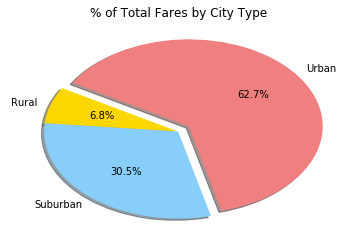

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

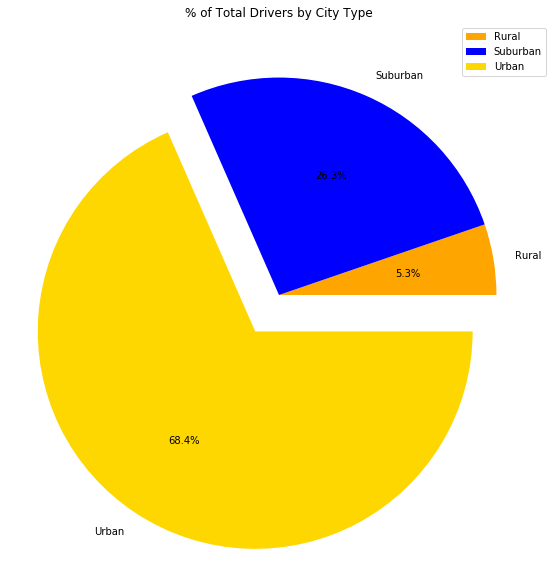

In [28]:
# Calculate Ride Percents
total_rides = cityride_data["ride_id"].count()
city_type = cityride_data.groupby("type")

ride_types = city_type["ride_id"].count()

percentage_2=(ride_types/total_rides) * 100

# Build Pie Chart
colors = ["Orange", "Blue", "Gold"]
explode = (0, 0, 0.2)
labels = percentage_2.index.tolist()
plt.figure(figsize=(10,10))
plt.pie(percentage_2, explode=(0, 0, 0.2),autopct="%1.1f%%", labels=percentage_2.index.tolist(), colors=["Orange", "Blue", "Gold"])
plt.title("% of Total Drivers by City Type")
plt.legend(loc= "upper right").sizes = [50]
# Save Figure
plt.savefig('pie_total_rides.png')
plt.show()

In [21]:
# Show Figure
plt.show()

## Total Drivers by City Type

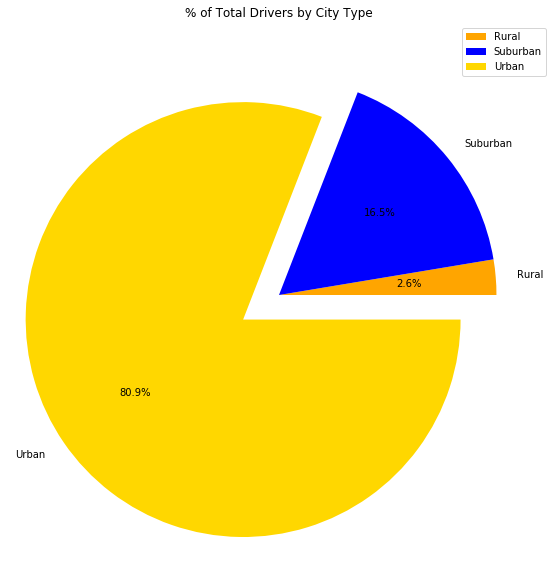

In [27]:
# Calculate Driver Percents
all_drivers = city_data.groupby(["type"])
total_drivers = all_drivers['driver_count'].sum()

# Build Pie Charts
plt.figure(figsize=(10,10))
plt.pie(total_drivers, explode=(0, 0, 0.2), autopct="%1.1f%%", labels=total_drivers.index.tolist(), colors=["Orange", "Blue", "Gold"])
plt.title("% of Total Drivers by City Type")
plt.legend(loc= "upper right").sizes = [50]


# Save Figure
plt.savefig('pie_total_drivers.png')
plt.show()